In [1]:
import numpy as np

In [31]:
load_py = np.load('D:/UnrealData/apartment_room_all.npy')

In [2]:
load_py = np.load('D:/UnrealData/slicing_sample_data500.npy')

## 예제 데이터 Port8083 단면도 값 지정

In [35]:
time = -1
kind = 6
#PV port 8081
flattened_array = load_py[1, :, :, :, time]

#port 8082
selectXYZ = 1
temp = np.rot90(flattened_array, 1, axes=(0,2))
# Port8083z = temp.max(axis=0).reshape(-1)
# Port8083y = temp.max(axis=1).reshape(-1)
# Port8083x = temp.max(axis=2).reshape(-1)
Port8083z = temp.max(axis=0)
Port8083y = temp.max(axis=1)
Port8083x = temp.max(axis=2)



In [13]:
Port8083z.shape

(93, 84)

In [14]:
Port8083y.shape

(101, 84)

In [15]:
Port8083x.shape

(101, 93)

## 예제 데이터 openCV를 통해 100,100으로 바꾸기

In [37]:
import cv2
import matplotlib.pyplot as plt

In [38]:
resized_array = cv2.resize(Port8083z, (100, 100), interpolation=cv2.INTER_LINEAR)
print(resized_array.shape)  # (100, 100)

(100, 100)


In [39]:
resized_array

array([[0.00038641, 0.00038641, 0.00038641, ..., 0.00320078, 0.00306522,
        0.00277401],
       [0.00038641, 0.00038641, 0.00038641, ..., 0.00332846, 0.00292585,
        0.00267979],
       [0.00038641, 0.00038641, 0.00038641, ..., 0.00261818, 0.00257598,
        0.0024794 ],
       ...,
       [0.00038641, 0.00038641, 0.00038641, ..., 0.00178648, 0.00140504,
        0.00108873],
       [0.00038641, 0.00038641, 0.00038641, ..., 0.00199206, 0.00171049,
        0.00167488],
       [0.00038641, 0.00038641, 0.00038641, ..., 0.0020901 , 0.00184118,
        0.00163218]], dtype=float32)

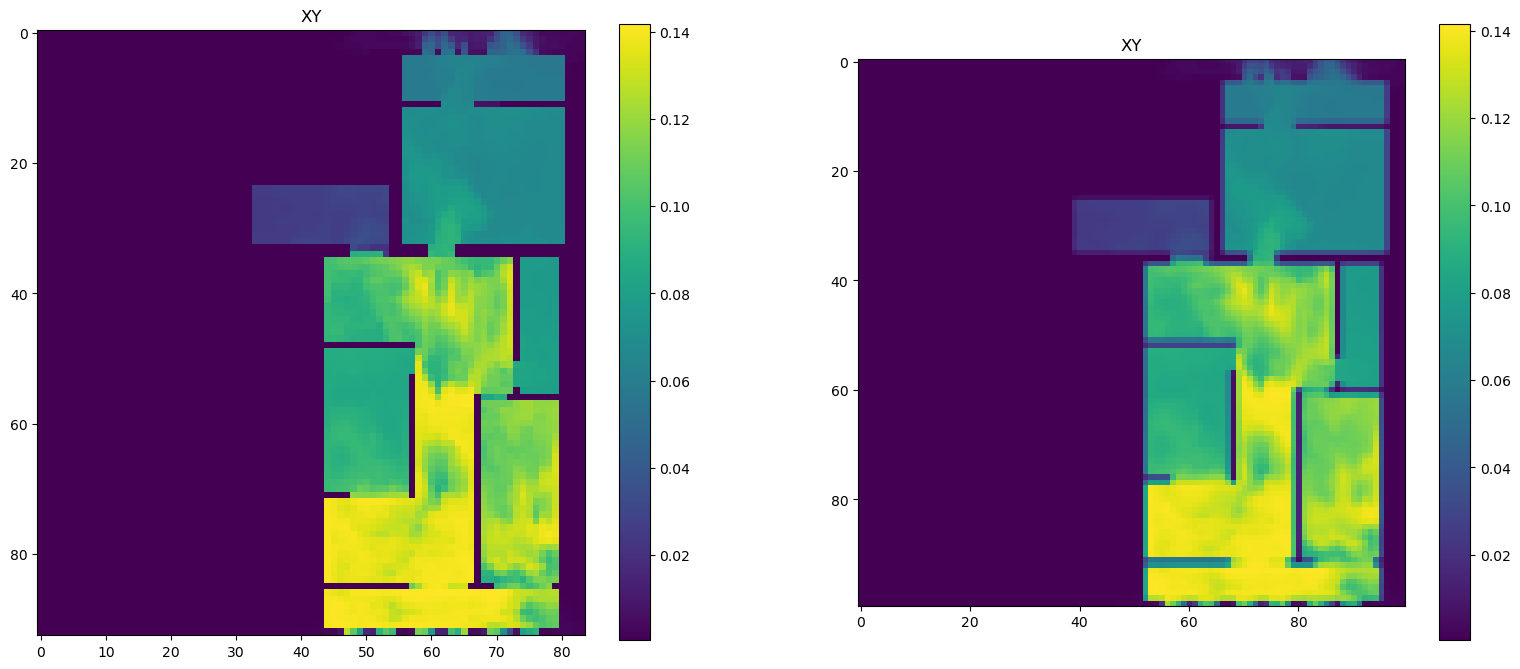

In [45]:
# 그래프 크기 설정
plt.figure(figsize=(30, 8))



# 첫 번째 서브플롯: XY 평면도 총합 -> Z
plt.subplot(1, 3, 1)
plt.imshow(Port8083z)  # 흑백 컬러맵 설정
plt.title('XY')
plt.colorbar()  # 색상 막대 추가

# 첫 번째 서브플롯: XY 평면도 총합 -> Z
plt.subplot(1, 3, 2)
plt.imshow(resized_array)  # 흑백 컬러맵 설정
plt.title('XY')
plt.colorbar()  # 색상 막대 추가

plt.show()

In [4]:
load_py.shape

(18, 84, 93, 101, 500)

In [5]:
print(len(load_py[6, 0, 0, :, 0]))

101


In [ ]:
load_py.shape

(18, 84, 93, 101, 500)

In [ ]:
load_py.shape[-1]-500

0

## Port8081 PV값 보내주기

In [ ]:

flattened_array = load_py[6, :, :, :, -2]
x, y, z = 10, 10, 10
flattened_array = flattened_array[x:x+10, y:y+10, z:z+5]

In [6]:
load_py.shape[4]

500

In [ ]:
load_py[6, :, :, :, -2] == load_py[6, :, :, :, load_py.shape[4]-2]

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [ ]:
flattened_array.shape

(10, 10, 5)

## 데이터 matplotlib로 보기

In [7]:
import matplotlib.pyplot as plt

In [11]:
load_py.shape

(18, 84, 93, 101, 500)

In [2]:
# 시간 정하기
time = -1
temp = load_py[1, :, :, :, time]

temp = np.rot90(temp, 1, axes=(0,2))

plt.figure(figsize=(30,8))

# xy 평면도 총합 -> z
plt.subplot(1, 3, 1)
plt.imshow(temp.max(axis=0))
print(temp.max(axis=0).reshape(-1))
plt.savefig('D:/UnrealData/sample_z.png')

 # xz 평면도 총합 -> Y
plt.subplot(1, 3, 2)
plt.imshow(temp.max(axis=1))
plt.savefig('D:/UnrealData/sample_y.png')

# yz 평면도 총합 -> X
plt.subplot(1, 3, 3)
plt.imshow(temp.max(axis=2))
plt.savefig('D:/UnrealData/sample_x.png')

NameError: name 'load_py' is not defined

NameError: name 'temp' is not defined

In [ ]:
temp.shape

(101, 93, 84)

In [ ]:
temp.dtype

dtype('float32')

In [ ]:
temp.max(axis=0).shape

(93, 84)

In [ ]:
temp.max(axis=1).shape

(101, 84)

In [ ]:
temp.max(axis=2).shape

(101, 93)

In [ ]:
temp.max(axis=0).reshape(-1).shape

(7812,)

In [ ]:
print(temp.max(axis=0).reshape(-1))

[0.00038641 0.00038641 0.00038641 ... 0.00221204 0.00190718 0.00163218]
